In [1]:
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.neighbors import LocalOutlierFactor

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("AirbnbIstanbul.csv")

## Exploring Dataframe

In [4]:
df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16249.0,1.885688e+07,1.054815e+07,4826.00000,8.501221e+06,2.162206e+07,2.870223e+07,3.245756e+07
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,16249.0,4.102646e+01,4.319419e-02,40.81469,4.100436e+01,4.103135e+01,4.104781e+01,4.141442e+01
longitude,16249.0,2.898539e+01,1.143542e-01,28.03200,2.897413e+01,2.898426e+01,2.902243e+01,2.990778e+01
price,16249.0,3.547277e+02,1.429008e+03,0.00000,1.050000e+02,1.900000e+02,3.270000e+02,5.956100e+04
minimum_nights,16249.0,4.693397e+00,2.891786e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.125000e+03
number_of_reviews,16249.0,7.188319e+00,2.144074e+01,0.00000,0.000000e+00,0.000000e+00,4.000000e+00,3.070000e+02
reviews_per_month,7768.0,9.152639e-01,1.087721e+00,0.01000,1.800000e-01,5.200000e-01,1.190000e+00,1.200000e+01
calculated_host_listings_count,16249.0,4.103699e+00,7.648426e+00,1.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.700000e+01
availability_365,16249.0,2.495084e+02,1.361509e+02,0.00000,1.010000e+02,3.400000e+02,3.650000e+02,3.650000e+02


In [6]:
df.drop_duplicates()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16244,32453285,luxury flat in city center atiye str nisantası,NaN,Sisli,41.04775,28.99283,Entire home/apt,248,1,0,NaN,NaN,4,358
16245,32453323,Double Room,NaN,Fatih,41.00435,28.97692,Private room,237,2,0,NaN,NaN,1,364
16246,32455952,Cozy room in charming home at the heart of Bey...,NaN,Beyoglu,41.03118,28.97837,Private room,53,3,0,NaN,NaN,2,345
16247,32457561,Perfect view with comfortable room,NaN,Kadikoy,40.99467,29.05423,Private room,100,1,0,NaN,NaN,1,364


In [7]:
print(df['neighbourhood'].drop_duplicates().count())

39


## Deleting Unnecessary Columns

In [8]:
df.drop(['id', 'last_review', 'neighbourhood_group', 'name'], axis=1, inplace=True)

In [10]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,1,83
3,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,13,356


## Missing Data

In [11]:
df.isnull().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8481
calculated_host_listings_count       0
availability_365                     0
dtype: int64

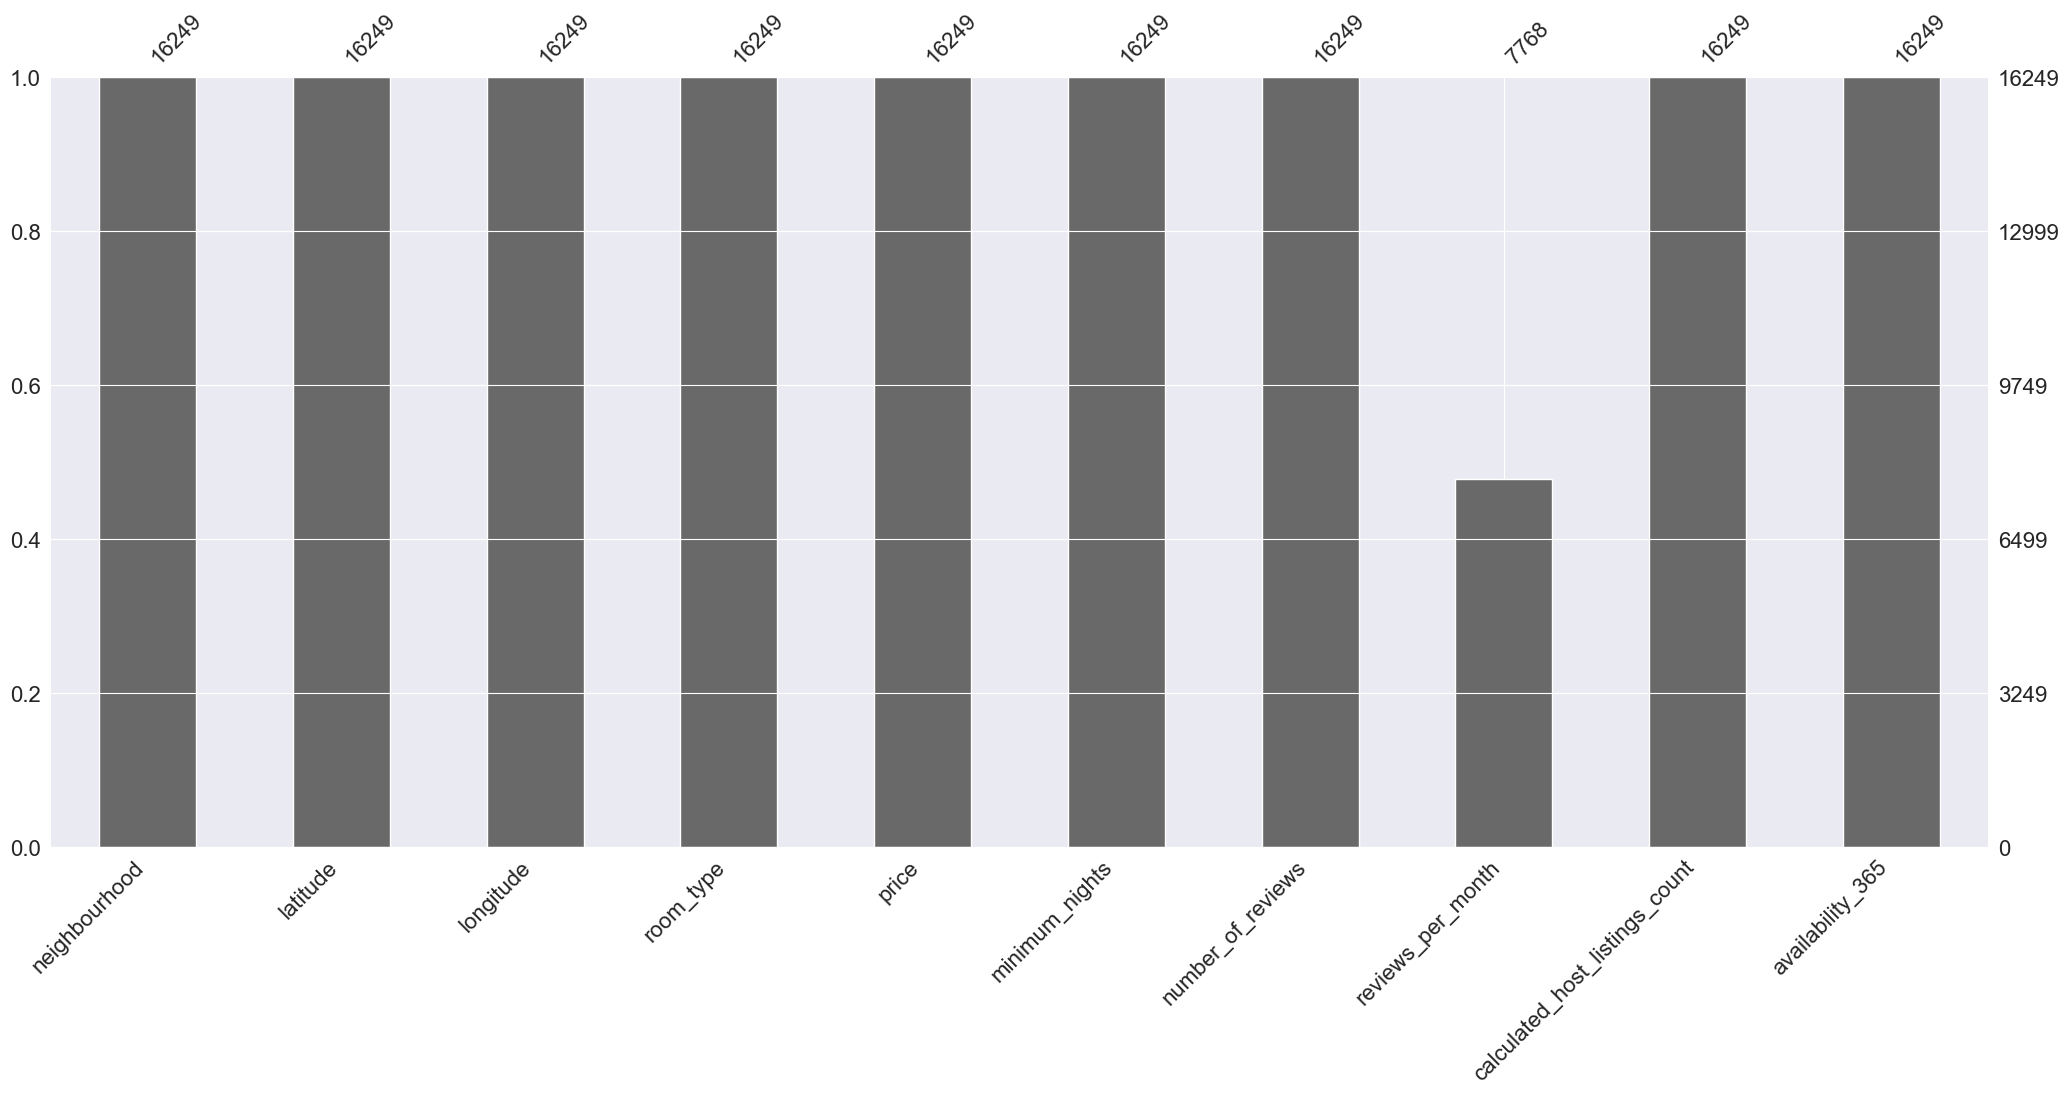

In [12]:
# visualise missing data
msno.bar(df);

* Missing Reviews Per Month

In [13]:
# If number of reviews is zero then reviews per month is nan
df['reviews_per_month'].fillna(0, inplace=True)

In [14]:
df.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Variable Transformation

In [15]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83
3,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356


In [16]:
df = pd.get_dummies(df, prefix=['room_type'],
                    columns=['room_type'], drop_first=True)

In [17]:
neighbourhoods = df['neighbourhood']
transformed_neighbourhood = LabelEncoder().fit_transform(df['neighbourhood'])
df['neighbourhood'] = transformed_neighbourhood

In [18]:
neighbourhoods_df = pd.DataFrame({"neighbourhoods": neighbourhoods,
                                  "transformed_neighbourhood": transformed_neighbourhood})

In [19]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room
0,37,41.05650,29.05367,554,1,1,0.01,1,365,False,False
1,9,41.06984,29.04545,100,30,41,0.38,2,49,False,False
2,9,41.07731,29.03891,211,21,0,0.00,1,83,False,False
3,12,41.03220,28.98216,237,5,2,0.04,1,228,False,False
4,32,41.04471,28.98567,591,3,0,0.00,13,356,False,False


## Outliers

In [20]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df)

array([ 1,  1, -1, ...,  1,  1,  1])

In [21]:
df_scores = clf.negative_outlier_factor_
df_scores

array([-1.10390502, -1.23558898, -1.66162686, ..., -1.03621847,
       -0.97471383, -1.11775109])

In [22]:
np.sort(df_scores[:])

array([-14.14503546, -13.89254756, -13.83506312, ...,  -0.94605708,
        -0.94598238,  -0.94495998])

In [23]:
tolerance = np.sort(df_scores[:])[10]

In [24]:
outlier_boolean = df_scores < tolerance
not_outlier_boolean = df_scores > tolerance

In [25]:
df[outlier_boolean]

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room
960,10,41.11567,29.12861,3164,10,0,0.0,1,365,False,False
4666,19,41.00715,28.97950,3248,1,0,0.0,25,365,False,False
4672,19,41.00638,28.97799,3132,1,0,0.0,25,365,False,False
6338,22,40.98005,29.07105,791,180,0,0.0,1,364,False,False
6372,29,41.21425,29.02405,3158,1,0,0.0,16,365,False,False
6459,29,41.19766,29.05359,1250,365,0,0.0,1,362,False,False
7071,29,41.09056,29.05388,738,365,0,0.0,1,358,False,False
7086,26,40.94296,29.13668,3427,2,0,0.0,1,365,True,False
8884,9,41.07829,29.03804,1055,360,0,0.0,1,365,False,False
12598,29,41.10007,29.05339,3164,2,0,0.0,17,364,False,False


In [26]:
df = df[not_outlier_boolean]

## Models

In [27]:
df

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room
0,37,41.05650,29.05367,554,1,1,0.01,1,365,False,False
1,9,41.06984,29.04545,100,30,41,0.38,2,49,False,False
2,9,41.07731,29.03891,211,21,0,0.00,1,83,False,False
3,12,41.03220,28.98216,237,5,2,0.04,1,228,False,False
4,32,41.04471,28.98567,591,3,0,0.00,13,356,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16244,32,41.04775,28.99283,248,1,0,0.00,4,358,False,False
16245,19,41.00435,28.97692,237,2,0,0.00,1,364,True,False
16246,12,41.03118,28.97837,53,3,0,0.00,2,345,True,False
16247,22,40.99467,29.05423,100,1,0,0.00,1,364,True,False


In [28]:
results = []
alg_names = []

In [29]:
def implement_ml_algorithm(alg, Xtr, ytr, Xte, yte):
    model = alg().fit(Xtr, ytr)
    score = np.sqrt(mean_squared_error(yte, model.predict(Xte)))

    results.append(score)
    alg_names.append(alg.__name__)

    # print("For " + alg.__name__, " pre RMSE: ", score)

In [30]:
algorithms = [Ridge, Lasso, ElasticNet, LinearRegression, LGBMRegressor,
              XGBRegressor, GradientBoostingRegressor, RandomForestRegressor,
              DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor, CatBoostRegressor]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], test_size=0.25,
                                                    random_state=5)

In [32]:
for algorithm in algorithms:
    implement_ml_algorithm(algorithm, X_train, y_train, X_test, y_test)

Learning rate set to 0.060772
0:	learn: 1364.9736696	total: 135ms	remaining: 2m 14s
1:	learn: 1360.9957580	total: 137ms	remaining: 1m 8s
2:	learn: 1357.3055956	total: 140ms	remaining: 46.5s
3:	learn: 1354.8573487	total: 142ms	remaining: 35.4s
4:	learn: 1350.9401969	total: 145ms	remaining: 28.8s
5:	learn: 1347.6191096	total: 147ms	remaining: 24.4s
6:	learn: 1344.7987533	total: 150ms	remaining: 21.2s
7:	learn: 1342.5884672	total: 152ms	remaining: 18.8s
8:	learn: 1339.8335812	total: 154ms	remaining: 17s
9:	learn: 1338.9977018	total: 156ms	remaining: 15.5s
10:	learn: 1337.8085685	total: 159ms	remaining: 14.3s
11:	learn: 1335.0561634	total: 161ms	remaining: 13.3s
12:	learn: 1333.4242433	total: 164ms	remaining: 12.4s
13:	learn: 1332.4867702	total: 166ms	remaining: 11.7s
14:	learn: 1331.0396519	total: 168ms	remaining: 11s
15:	learn: 1330.1202854	total: 170ms	remaining: 10.5s
16:	learn: 1327.7924599	total: 173ms	remaining: 9.98s
17:	learn: 1326.9408147	total: 175ms	remaining: 9.56s
18:	learn: 

In [33]:
result_df = pd.DataFrame({
    "Algorithm": alg_names,
    "Scores": results
})

In [34]:
result_df

,Algorithm,Scores
0,Ridge,1594.740475
1,Lasso,1595.298496
2,ElasticNet,1596.348053
3,LinearRegression,1594.715343
4,LGBMRegressor,1521.208215
5,XGBRegressor,1502.128797
6,GradientBoostingRegressor,1499.297739
7,RandomForestRegressor,1452.330727
8,DecisionTreeRegressor,2507.548178
9,MLPRegressor,1593.031783


#### GBMRegressor

In [35]:
x = GradientBoostingRegressor()
?x

In [36]:
gbm_params = {"learning_rate": [0.01, 0.001, 0.0001],
              "n_estimators": [200, 500, 2000, 3000],
              "max_depth": [5, 7, 9, 11, 13, 15, 20], }

In [ ]:
gbm_cv_model = GridSearchCV(LGBMRegressor(), gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

In [ ]:
gbm_cv_model.best_params_

In [40]:
tuned_gbm = LGBMRegressor(learning_rate=0.001, max_depth=17, n_estimators=2000).fit(X_train, y_train)

In [41]:
np.sqrt(mean_squared_error(y_test, tuned_gbm.predict(X_test)))

1521.2082151072623

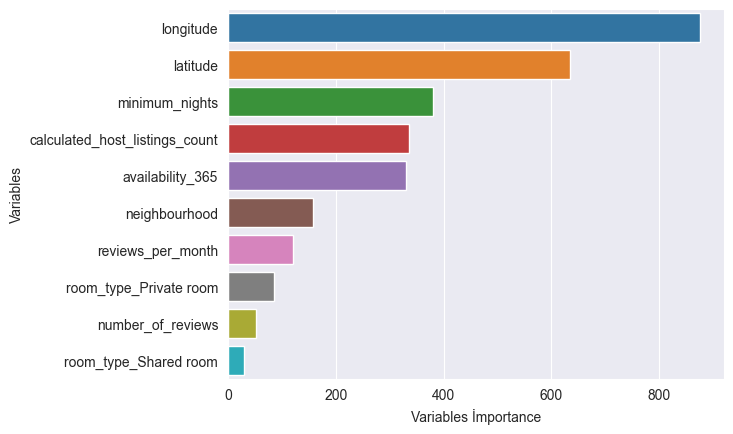

In [42]:
feature_imp = pd.Series(tuned_gbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables İmportance')
plt.ylabel('Variables')
plt.show()